# Haberman's Cancer Survival Dataset Analysis

## 1.Objective

    To find the survival status of the patient after their cancer treatment

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("C:\\Users\\Elixir\\Downloads")

#### Read data from csv file

In [3]:
haberman=pd.read_csv("haberman.csv")

In [4]:
haberman

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


#### Rename the column name and column values as per user convenient

In [5]:
haberman.columns=['age','operation_year','lymph_node','survival_status']

In [6]:
haberman.survival_status=haberman.survival_status.replace({1:"=>5",2:"<5"})
haberman.operation_year=haberman.operation_year.replace(haberman['operation_year']+1900)
haberman

,age,operation_year,lymph_node,survival_status
0,30,1959,3,=>5
1,30,1963,0,=>5
2,31,1965,2,=>5
3,31,1963,4,=>5
4,33,1962,10,=>5
5,33,1963,0,=>5
6,34,1965,0,<5
7,34,1964,9,<5
8,34,1962,30,=>5
9,34,1963,1,=>5


#### Find the number of data points,features and class attribute

In [7]:
print(haberman.shape)
print(haberman.columns)

(305, 4)
Index(['age', 'operation_year', 'lymph_node', 'survival_status'], dtype='object')


* In this dataset have a three features (age,operation of year,lymph nodes) and one class attribute(survival_status)
* Number of data points = 305

#### Find the Number of classes

In [8]:
haberman['survival_status'].value_counts()

=>5    224
<5      81
Name: survival_status, dtype: int64

There are two classes in the class attribute (1=greater than or equal to 5 years and 2=less than 5 years)

## 2.Bi-variate Analysis

### 2.1 Pair plot

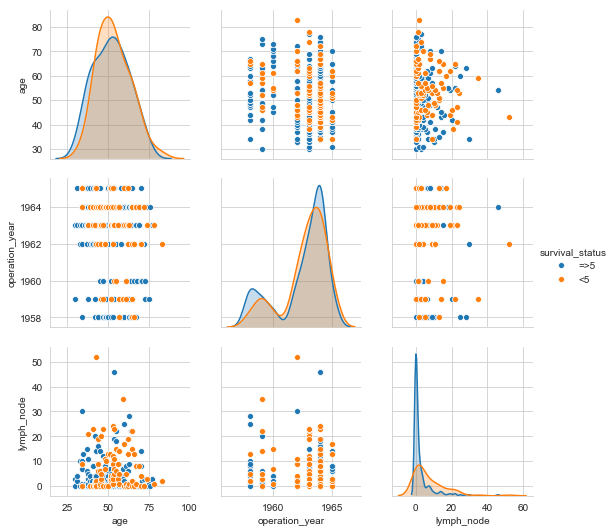

In [9]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="survival_status");
plt.show()

### Observation:

* From the pairplot lymph node is Good feature to identify the survival status of the patient compared to other features.
* In the bivariate analysis(pair plot), there is more overlapping present.
* So we move to the univariate analysis.

## 3. Univariate Analysis

### 3.1 Histogram

#### Histogram analysis of Positive Auxillary lymph Nodes

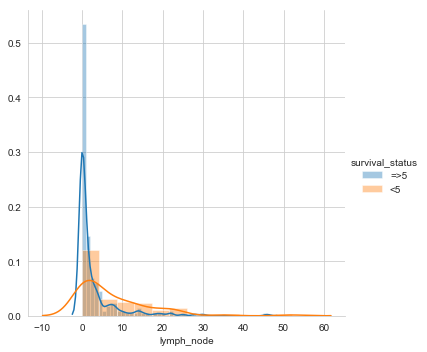

In [10]:
plt.close()
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,'lymph_node').add_legend()
plt.show()

#### Histogram analysis of Operation Year

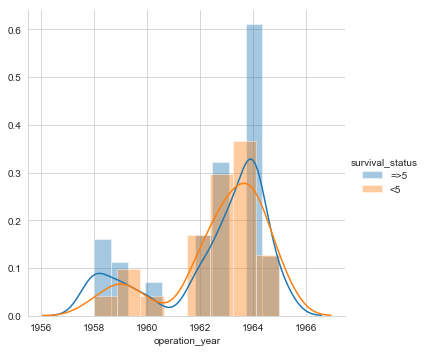

In [11]:
plt.close()
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,'operation_year').add_legend()
plt.show()

#### Histogram analysis of age

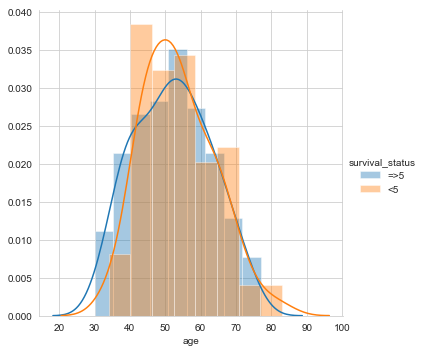

In [12]:
plt.close()
sns.FacetGrid(haberman,hue='survival_status',height=5).map(sns.distplot,'age').add_legend()
plt.show()

### Observation

* In the Histogram analysis lymph node and operation year features are better compare to other feature
* So we analyze the PDF and CDF of lymph node and operation year

### 3.2 PDF and CDF Analysis

#### PDF and CDF analysis of lymph Node

In [13]:
haberman_survive_greater_than_five=haberman.loc[haberman['survival_status'] == '=>5']

In [14]:
haberman_survive_less_than_five=haberman.loc[haberman['survival_status'] == '<5']

In [15]:
counts_lymph_1,bins_lymph_1= np.histogram(haberman_survive_greater_than_five['lymph_node'],bins=9,density=True)
print("Survive status Greater than 5 years")
print(counts_lymph_1)
print(bins_lymph_1)
print(" ")
print("*************************************************************")
print(" ")
print("Survive status Less than 5 years")
counts_lymph_2,bins_lymph_2 = np.histogram(haberman_survive_less_than_five['lymph_node'],bins=6,density=True)
print(counts_lymph_2)
print(bins_lymph_2)

Survive status Greater than 5 years
[0.16508152 0.01572205 0.00611413 0.00349379 0.00262034 0.00174689
 0.         0.         0.00087345]
[ 0.          5.11111111 10.22222222 15.33333333 20.44444444 25.55555556
 30.66666667 35.77777778 40.88888889 46.        ]
 
*************************************************************
 
Survive status Less than 5 years
[0.07549858 0.02421652 0.01282051 0.         0.0014245  0.0014245 ]
[ 0.          8.66666667 17.33333333 26.         34.66666667 43.33333333
 52.        ]


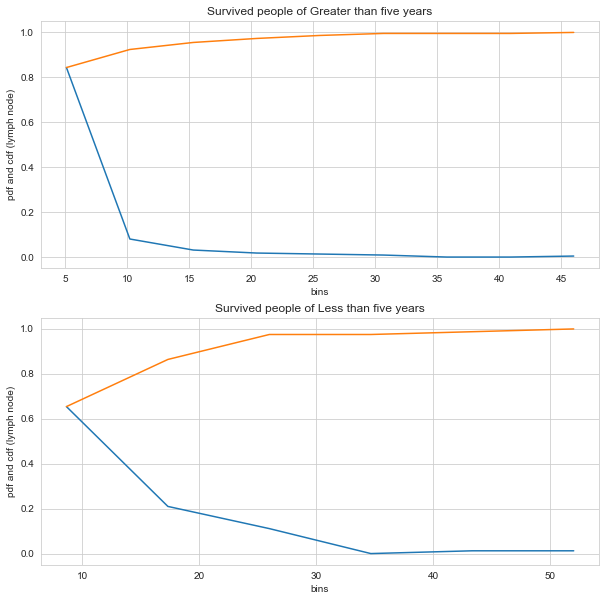

In [16]:
#Greater than five year

pdf_lymph_1=counts_lymph_1/sum(counts_lymph_1)
cdf_lymph_1=np.cumsum(pdf_lymph_1)
plt.close()
plt.figure(num=1,figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Survived people of Greater than five years")
plt.xlabel("bins")
plt.ylabel("pdf and cdf (lymph node)")
plt.plot(bins_lymph_1[1:],pdf_lymph_1)
plt.plot(bins_lymph_1[1:],cdf_lymph_1)

#Less than five years

pdf_lymph_2=counts_lymph_2/sum(counts_lymph_2)
cdf_lymph_2=np.cumsum(pdf_lymph_2)
plt.subplot(2,1,2)
plt.title("Survived people of Less than five years")
plt.xlabel("bins")
plt.ylabel("pdf and cdf (lymph node)")
plt.plot(bins_lymph_2[1:],pdf_lymph_2)
plt.plot(bins_lymph_2[1:],cdf_lymph_2)
plt.show()

#### PDF and CDF analysis of Operation year

In [17]:
counts_opyear_1,bins_opyear_1 = np.histogram(haberman_survive_greater_than_five['operation_year'],bins=7,density=True)
print("Survive status Greater than 5 years")
print(counts_opyear_1)
print(bins_opyear_1)
print(" ")
print("*************************************************************")
print(" ")
counts_opyear_2,bins_opyear_2 = np.histogram(haberman_survive_less_than_five['operation_year'],bins=7,density=True)
print("Survive status Less than 5 years")
print(counts_opyear_2)
print(bins_opyear_2)

Survive status Greater than 5 years
[0.10267857 0.07142857 0.04464286 0.         0.10714286 0.20535714
 0.46875   ]
[1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965.]
 
*************************************************************
 
Survive status Less than 5 years
[0.03703704 0.08641975 0.03703704 0.         0.14814815 0.25925926
 0.43209877]
[1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965.]


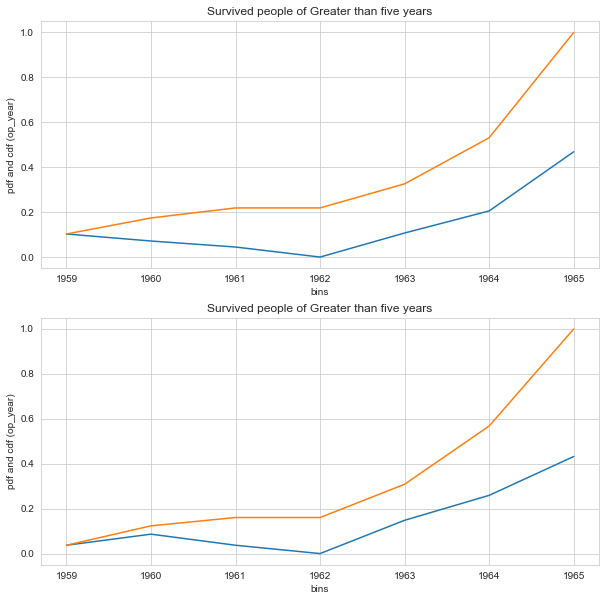

In [18]:
#Greater than five year

pdf_opyear_1=counts_opyear_1/sum(counts_opyear_1)
cdf_opyear_1=np.cumsum(pdf_opyear_1)
plt.close()
plt.figure(2,figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Survived people of Greater than five years")
plt.xlabel("bins")
plt.ylabel("pdf and cdf (op_year)")
plt.plot(bins_opyear_1[1:],pdf_opyear_1)
plt.plot(bins_opyear_1[1:],cdf_opyear_1)

#Less than five years

pdf_opyear_2=counts_opyear_2/sum(counts_opyear_2)
cdf_opyear_2=np.cumsum(pdf_opyear_2)
plt.subplot(2,1,2)
plt.title("Survived people of Greater than five years")
plt.xlabel("bins")
plt.ylabel("pdf and cdf (op_year)")
plt.plot(bins_opyear_2[1:],pdf_opyear_2)
plt.plot(bins_opyear_2[1:],cdf_opyear_2)
plt.show()

### Observation

* From the PDF and CDF analysis of lymph node feature, nearly 84% of above five years survived people have 0 to 5 lymph nodes.
* From the PDF and CDF analysis of lympgh node feature, nearly 64% of below five years survived people have less than 10 lymph nodes
* From the PDF and CDF analysis of operation year feature, The number of survived people are high after the operated year of 1963 compared to rest years.

### 3.3 Box-Plot

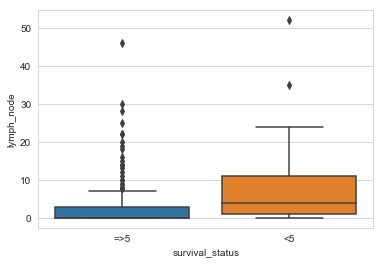

In [19]:
plt.close()
sns.boxplot(x="survival_status",y='lymph_node',data=haberman)
plt.show()

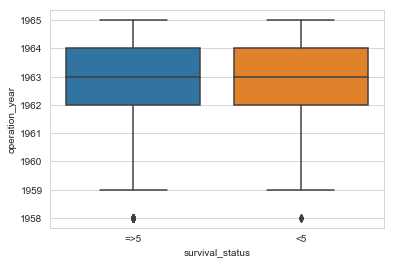

In [20]:
plt.close()
sns.boxplot(x="survival_status",y='operation_year',data=haberman)
plt.show()

### 3.4 Violin Plot

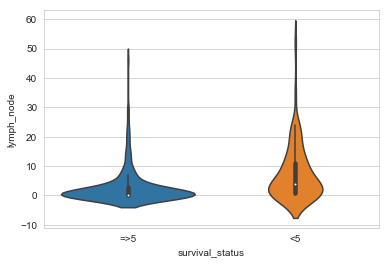

In [21]:
plt.close()
sns.violinplot(x="survival_status",y='lymph_node',data=haberman)
plt.show()

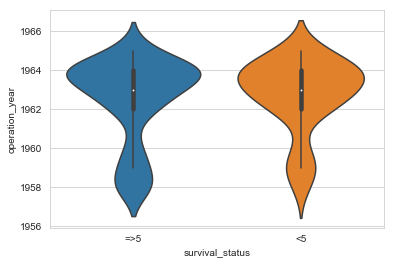

In [22]:
plt.close()
sns.violinplot(x="survival_status",y='operation_year',data=haberman)
plt.show()

### Observation

* From the lymph node feature, most of the survived people have less than 10 positive lymph nodes.
* From the Operation year feature, most of the survived people are operated after the year of 1963.

## 4. Multivariate Analysis

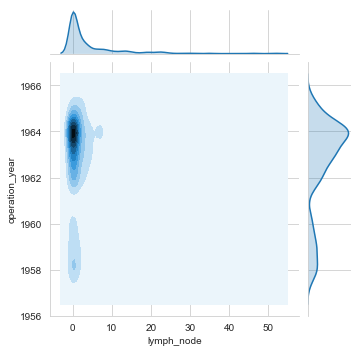

In [23]:
plt.close()
sns.jointplot(x='lymph_node',y='operation_year',data=haberman,height=5,kind='kde')
plt.show()

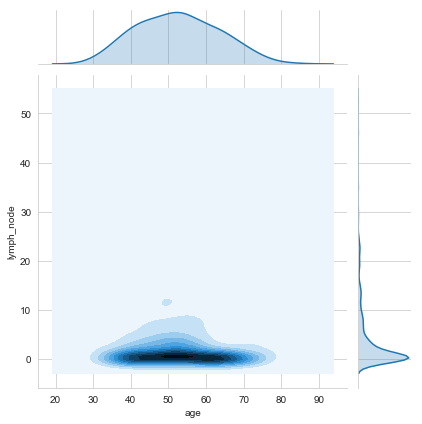

In [24]:
plt.close()
sns.jointplot(x='age',y='lymph_node',data=haberman,kind='kde')
plt.show()

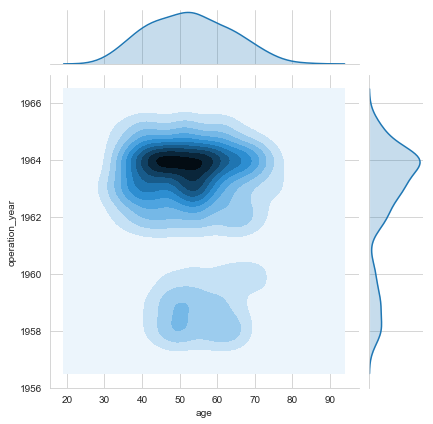

In [25]:
plt.close()
sns.jointplot(x='age',y='operation_year',data=haberman,kind='kde')
plt.show()

### Observation

From the haberman dataframe

* Most of the survival people are treated after 1963.
* Most of the survival people have less than 10 lymph nodes

## Statistical Analysis

In [26]:
haberman_survive_greater_than_five.describe()

,age,operation_year,lymph_node
count,224.000000,224.000000,224.000000
mean,52.116071,1962.508929,2.799107
std,10.937446,2.169894,5.882237
min,30.000000,1958.000000,0.000000
25%,43.000000,1962.000000,0.000000
50%,52.000000,1963.000000,0.000000
75%,60.000000,1964.000000,3.000000
max,77.000000,1965.000000,46.000000


In [27]:
haberman_survive_less_than_five.describe()

,age,operation_year,lymph_node
count,81.000000,81.000000,81.000000
mean,53.679012,1962.753086,7.456790
std,10.167137,1.881029,9.185654
min,34.000000,1958.000000,0.000000
25%,46.000000,1962.000000,1.000000
50%,53.000000,1963.000000,4.000000
75%,61.000000,1964.000000,11.000000
max,83.000000,1965.000000,52.000000


* The mean of lymph node is high who survived less than 5 years than who survived more than 5 years.
* The mean of survived people age is 54.
* The 75% percentile survived people are treated after the 1964 and 25% percentile survived people are treated after 1962.


## 5. Conclusion

* In this haberman dataset have
    * 305 datapoints
    * 3 features (age,operation year and lymph node count)
    * 1 class attribute(survived status) and two classes (survived more than 5 years and survived less than 5 year)
        * Survived more than 5 years class have 224 Datapoints
        * Survived less than 5 years class have 81 Datapoints
* After the Univariate,Bi-variate and multivariate analysis, the two feature is important compared to the others
    * First one is lymph node
    * Second one is Operation year
* From the Exploratory Data Analysis of Haberman Dataset, Most of the survived people have less than 10 Positive lymph nodes and Most of the survived people treated after the year of 1963 (operation-year).